In [251]:
import numpy as np
#import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [252]:
# global variables
mu=np.array([0.0,0.0,0.0]) # notice mu is global
# correlation between elements is increasing
cov_1=np.array([[1.0,0.0,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]])
cov_2=np.array([[1.0,0.5,0.5],[0.5,1.0,0.5],[0.5,0.5,1.0]])
cov_3=np.array([[1.0,0.5,0.9],[0.5,1.0,0.9],[0.5,0.5,1.0]])
#initialize
M = 500 # burn in period
N=5000
n=N+M
X0 = [1.0,0.0,0.0] #??? in python array is an object. Notice assignment
A=np.array([1,1,1])

testify that cov_2 is a valid covariance matrix:  
1. Symmetric
2. Positive semi definite

In [253]:
lamda2,vector2=np.linalg.eig(cov_2)
lamda2

array([ 0.5,  2. ,  0.5])

In [254]:
lamda3,vector3=np.linalg.eig(cov_3)
lamda3

array([ 2.23107084,  0.5       ,  0.26892916])

### Standard Gibbs Sampling
Sampling from conditional distribution

conditional MVN

In [255]:
# parameter should all be in array
def cond_mu(Y_1, mu_1, mu_2, sig_21, sig_11_inv):
    #sig_11_inv = np.linalg.inv(sig_11)
    result1 = mu_2[:,None]+np.dot(np.dot(sig_21,sig_11_inv),(Y_1-mu_1)[:,None])
    return result1   

In [256]:
# parameter should all be in 2d array
def cond_cov(sig_11_inv,sig_12, sig_21,sig_22):
    result2 = sig_22-np.dot(np.dot(sig_21,sig_11_inv),sig_12)
    return result2   

In [257]:
# get conditional parameters
#sig_11_inv=np.linalg.inv(cov_1[:2,:2])
#mu3_12 = cond_mu(X[:2],mu[:2],mu[2:],cov_1[2:,:2],cov_1[:2,:2]) 
def get_cov3_12(cov):
    result3 = cond_cov(np.linalg.inv(cov[:2,:2]),cov[:2,:1],cov[2:,:2],cov[2:,2:])
    return result3

In [258]:
#mu1_23 = cond_mu(X[1:],mu[1:],mu[:1],cov_1[:1,1:],cov_1[1:,1:]) 
def get_cov1_23(cov):
    result4 = cond_cov(np.linalg.inv(cov[1:,1:]),cov[1:,:1],cov[:1,1:],cov[:1,:1])
    return result4

In [259]:
#X_1 = np.array([X[0],X[2]]) # X
def get_cov2_13(cov):
    #Mu_1 = np.array([mu[0],mu[2]])
    #Mu_2 = np.array([mu[1]])
    Sig_11 = np.array([[cov[0,0],cov[0,2]],[cov[2,0],cov[2,2]]])
    Sig_12 = np.array([cov[0,1],cov[2,1]])[:,None]
    Sig_21 = np.array([cov[1,0],cov[1,2]])[None,:]
    Sig_22 = np.array([[cov[1,1]]])
    #mu2_13 = cond_mu(X_1, Mu_1, Mu_2, Sig_21, Sig_11) 
    #print Sig_11
    #print Sig_22
    #print Sig_12
    #print Sig_21
    result5 = cond_cov(np.linalg.inv(Sig_11),Sig_12, Sig_21,Sig_22)
    return result5

In [260]:
def get_mu1_23(X_c, cov):
    result6 = cond_mu(X_c,mu[1:],mu[:1],cov[:1,1:],np.linalg.inv(cov[1:,1:]))  
    return result6

In [261]:
def get_mu2_13(X_c,cov):
    Mu_1 = np.array([mu[0],mu[2]])
    Mu_2 = np.array([mu[1]])
    Sig_11 = np.array([[cov[0,0],cov[0,2]],[cov[2,0],cov[2,2]]])
    Sig_21 = np.array([cov[1,0],cov[1,2]])[None,:]
    #print Sig_21
    #print Sig_11
    result7 = cond_mu(X_c, Mu_1, Mu_2, Sig_21, np.linalg.inv(Sig_11))
    return result7

In [262]:
def get_mu3_12(X_c,cov):
    result8 = cond_mu(X_c,mu[:2],mu[2:],cov[2:,:2],np.linalg.inv(cov[:2,:2]))
    return result8

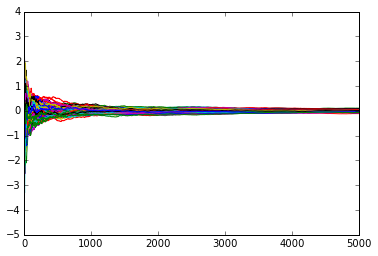

In [267]:
estimators=[]
for r in range(100):
    # burn in period:
    X=np.array(X0)
    for i in range(M):
        #print X0
        #mu1_23 = cond_mu(X[1:],mu[1:],mu[:1],cov_1[:1,1:],cov_1[1:,1:]) 
        mu1_23 = get_mu1_23(X[1:],cov_2)
        #print "mu1_23",mu1_23
        #print cov_3
        cov1_23 = get_cov1_23(cov_2)
        #print "cov1_23", cov1_23
        x1 = np.random.normal(np.asscalar(mu1_23),np.asscalar(cov1_23))
        #print X0
        X[0] = x1
        #print X0
        #print X
    
        X_13 = np.array([X[0],X[2]]) 
        #print "X_13",X_13
        mu2_13 = get_mu2_13(X_13,cov_2)
        #print "mu2_13",mu2_13
        cov2_13 = get_cov2_13(cov_2)
        x2 = np.random.normal(np.asscalar(mu2_13),np.asscalar(cov2_13))
        X[1] = x2
        #print X0
    
        #mu3_12 = cond_mu(X[:2],mu[:2],mu[2:],cov_1[2:,:2],cov_1[:2,:2])
        mu3_12 = get_mu3_12(X[:2],cov_2)
        #print "mu3_12",mu3_12
        cov3_12 = get_cov3_12(cov_2)
        x3 = np.random.normal(np.asscalar(mu3_12),np.asscalar(cov3_12))
        X[2] = x3
        #print X
        
        
        # Iteration
    #N = 10000

    X_list = []
    avrg=[]    
    s=0
    for i in range(N):
        #mu1_23 = cond_mu(X[1:],mu[1:],mu[:1],cov_1[:1,1:],cov_1[1:,1:]) 
        mu1_23 = get_mu1_23(X[1:],cov_2)
        #print "mu1_23",mu1_23
        #print cov_3
        cov1_23 = get_cov1_23(cov_2)
        #print "cov1_23", cov1_23
        x1 = np.random.normal(np.asscalar(mu1_23),np.asscalar(cov1_23))
        #print X0
        X[0] = x1
        #print X0
        #print X
    
        X_13 = np.array([X[0],X[2]]) 
        #print "X_13",X_13
        mu2_13 = get_mu2_13(X_13,cov_2)
        #print "mu2_13",mu2_13
        cov2_13 = get_cov2_13(cov_2)
        x2 = np.random.normal(np.asscalar(mu2_13),np.asscalar(cov2_13))
        X[1] = x2
        #print X0
    
        #mu3_12 = cond_mu(X[:2],mu[:2],mu[2:],cov_1[2:,:2],cov_1[:2,:2])
        mu3_12 = get_mu3_12(X[:2],cov_2)
        #print "mu3_12",mu3_12
        cov3_12 = get_cov3_12(cov_2)
        x3 = np.random.normal(np.asscalar(mu3_12),np.asscalar(cov3_12))
        X[2] = x3
        #print X
    

        X_list.append(X.copy())
    
        f = np.dot(A[None,:],X[:,None])
        s=s+f[0,0]
        avrg.append(s/(i+1)) 
        
    t = range(N)
    plt.plot(t,avrg)
    estimators.append(avrg[N-1])


In [268]:
# Estimator
sample_mean = np.mean(estimators)
sample_variance = 1.0/(N-1)*np.sum([(e-sample_mean)**2 for e in estimators])
print sample_mean
print sample_variance

0.00113563690763
3.44122338774e-05


In [ ]:
#t = range(N)
#plt.plot(t,avrg)

|samples number|cov 1| cov 2| cov 3|
|---------|---------|---------|--------|
|sample mean|0.00132746644229 |-0.00282048687081 |0.00271732885801 |
|sample var|1.09196738097e-05 |4.27269519568e-05|7.9752030501e-05 | |


In [269]:
Xlist_std_2 = list(X_list)

In [265]:
Xlist_std_3 = list(X_list)

In [270]:
print Xlist_std_3[N-1]
print Xlist_std_2[N-1]

[-0.66033378 -0.27116646 -0.48400647]
[ 0.62858643  1.51557348  0.47321447]


In [271]:
X_S_2=np.array(Xlist_std_2)[:,0]
Z_S_2=np.array(Xlist_std_2)[:,2]

In [275]:
from scipy import stats
sp.stats.pearsonr(X_S_2, Z_S_2)

(0.57753371114398133, 0.0)

In [272]:
X_S_3=np.array(Xlist_std_3)[:,0]
Z_S_3=np.array(Xlist_std_3)[:,2]

In [276]:
from scipy import stats
sp.stats.pearsonr(X_S_3, Z_S_3)

(0.64070845894655148, 0.0)

Correlation:

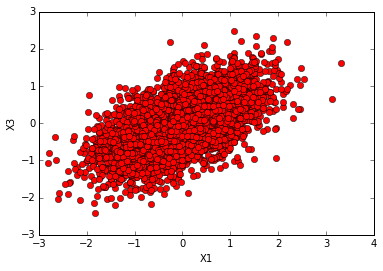

In [277]:
plt.plot(X_S_2,Z_S_2,'ro')
plt.xlabel('X1')
plt.ylabel('X3')

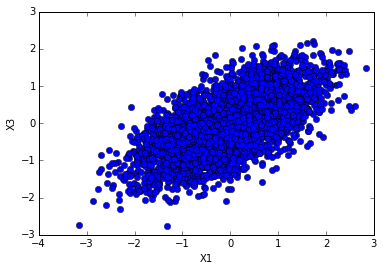

In [278]:
plt.plot(X_S_3,Z_S_3,'bo')
plt.xlabel('X1')
plt.ylabel('X3')

### Collapsed Gibbs Sampling

conditional mean and covariance matrix

In [185]:
def get_mean(i,j,cov,x_t): #passing vars are local
    result=mu[i]+ cov[i,j]*(1.0/cov[j,j])*(x_t[j]-mu[j])   
    return result

In [186]:
def get_cov(i,j,cov):
    result=cov[i,i]-cov[i,j]*(1.0/cov[i,i])*cov[i,j]
    return result

In [187]:
#initialize
M = 500 # burn in period
N=5000
n=N+M
X0 = [1.0,0.0,0.0] #???
X= X0
A=np.array([1,1,1])

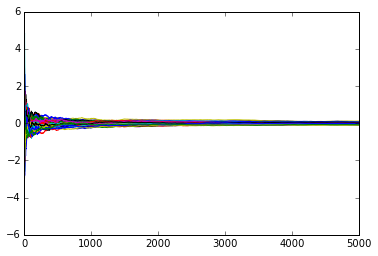

In [188]:
# burn in period:
estimators=[]
for k in range(100):
    X=np.array(X0)
    for i in range(M):
        x1 = np.random.normal(get_mean(0,2,cov_3,X),get_cov(0,2,cov_3))
        X[0]=x1

        x2 = np.random.normal(get_mean(1,0,cov_3,X),get_cov(1,0,cov_3))
        X[1]=x2
    
        x3 = np.random.normal(get_mean(2,1,cov_3,X),get_cov(2,1,cov_3))
        X[2]=x3
        
    # Iterations
    # notice array assignment
    X_list = []
    avrg=[]    
    s=0
    for i in range(N):
        x1 = np.random.normal(get_mean(0,2,cov_3,X),get_cov(0,2,cov_3))
        X[0]=x1

        x2 = np.random.normal(get_mean(1,0,cov_3,X),get_cov(1,0,cov_3))
        X[1]=x2
    
        x3 = np.random.normal(get_mean(2,1,cov_3,X),get_cov(2,1,cov_3))
        X[2]=x3
    
        X_list.append(X.copy())
        f = np.dot(A[None,:],X[:,None])
        s=s+f[0,0]
        avrg.append(s/(i+1))
        
    t = range(N)
    plt.plot(t,avrg)
    estimators.append(avrg[N-1])

In [189]:
# Estimator
sample_mean = np.mean(estimators)
sample_variance = 1.0/(N-1)*np.sum([(e-sample_mean)**2 for e in estimators])
print sample_mean
print sample_variance

0.000242777089832
4.28336249358e-05


|samples number|cov 1| cov 2| cov 3|
|---------|---------|---------|--------|
|sample mean|0.00235526695451 |0.000735993487765|0.0014497984921 |
|sample var|1.23314921638e-05 |2.48646672455e-05|3.52659459534e-05 | 

Compared with Standard Gibbs Sampling, Collapsed is much more faster (fastest). Why faster?

here we record all the data from group 2 and grooup 3 for future uses.

In [183]:
Xlist_t_clps_2 = list(X_list)

In [190]:
Xlist_t_clps_3 = list(X_list)

In [192]:
print Xlist_t_clps_2[N-1]
print Xlist_t_clps_3[N-1]

[ 0.05348733  0.90467693 -0.39908891]
[ 0.88772356 -0.2281704   0.25622083]


### Partially Collapsed Gibbs Sampling

inrease correlation between elements x1 and x2. Using Partially collapsed gibbs model to testify the correlation's effect on the sampling

In [225]:
#initialize
M = 500 # burn in period
N=5000
n=N+M
X0 = [1.0,0.0,0.0] #???
A=np.array([1,1,1])

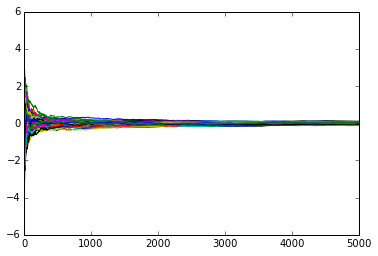

In [226]:
# burn in period:
for k in range(100):
    X=np.array(X0)
    for i in range(M):
        
        ###order 1
        x1 = np.random.normal(get_mean(0,1,cov_3,X),get_cov(0,1,cov_3))
        X[0]=x1
    
        X_13 = np.array([X[0],X[2]]) 
        #print "X_13",X_13
        mu2_13 = get_mu2_13(X_13,cov_3)
        #print "mu2_13",mu2_13
        cov2_13 = get_cov2_13(cov_3)
        x2 = np.random.normal(np.asscalar(mu2_13),np.asscalar(cov2_13))
        X[1] = x2
        #print X0
    
        #mu3_12 = cond_mu(X[:2],mu[:2],mu[2:],cov_1[2:,:2],cov_1[:2,:2])
        mu3_12 = get_mu3_12(X[:2],cov_3)
        #print "mu3_12",mu3_12
        cov3_12 = get_cov3_12(cov_3)
        x3 = np.random.normal(np.asscalar(mu3_12),np.asscalar(cov3_12))
        X[2] = x3  
        '''  
        ###order 2
        mu3_12 = get_mu3_12(X[:2],cov_3)
        #print "mu3_12",mu3_12
        cov3_12 = get_cov3_12(cov_3)
        x3 = np.random.normal(np.asscalar(mu3_12),np.asscalar(cov3_12))
        X[2] = x3
        
        x1 = np.random.normal(get_mean(0,1,cov_3,X),get_cov(0,1,cov_3))
        X[0]=x1
    
        X_13 = np.array([X[0],X[2]]) 
        #print "X_13",X_13
        mu2_13 = get_mu2_13(X_13,cov_3)
        #print "mu2_13",mu2_13
        cov2_13 = get_cov2_13(cov_3)
        x2 = np.random.normal(np.asscalar(mu2_13),np.asscalar(cov2_13))
        X[1] = x2
        #print X0
        '''
       
  
        # Iteration
    X_list = []
    avrg=[]    
    s=0
    for i in range(N):
        
        x1 = np.random.normal(get_mean(0,1,cov_3,X),get_cov(0,1,cov_3))
        X[0]=x1
    
        X_13 = np.array([X[0],X[2]]) 
        #print "X_13",X_13
        mu2_13 = get_mu2_13(X_13,cov_3)
        #print "mu2_13",mu2_13
        cov2_13 = get_cov2_13(cov_3)
        x2 = np.random.normal(np.asscalar(mu2_13),np.asscalar(cov2_13))
        X[1] = x2
        #print X0
    
        #mu3_12 = cond_mu(X[:2],mu[:2],mu[2:],cov_1[2:,:2],cov_1[:2,:2])
        mu3_12 = get_mu3_12(X[:2],cov_3)
        #print "mu3_12",mu3_12
        cov3_12 = get_cov3_12(cov_3)
        x3 = np.random.normal(np.asscalar(mu3_12),np.asscalar(cov3_12))
        X[2] = x3 
        '''
        mu3_12 = get_mu3_12(X[:2],cov_3)
        #print "mu3_12",mu3_12
        cov3_12 = get_cov3_12(cov_3)
        x3 = np.random.normal(np.asscalar(mu3_12),np.asscalar(cov3_12))
        X[2] = x3
        
        x1 = np.random.normal(get_mean(0,1,cov_3,X),get_cov(0,1,cov_3))
        X[0]=x1
    
        X_13 = np.array([X[0],X[2]]) 
        #print "X_13",X_13
        mu2_13 = get_mu2_13(X_13,cov_3)
        #print "mu2_13",mu2_13
        cov2_13 = get_cov2_13(cov_3)
        x2 = np.random.normal(np.asscalar(mu2_13),np.asscalar(cov2_13))
        X[1] = x2
        #print X0
        '''
        X_list.append(X.copy())
    
        f = np.dot(A[None,:],X[:,None])
        s=s+f[0,0]
        avrg.append(s/(i+1)) 
        
    t = range(N)
    plt.plot(t,avrg)
    estimators.append(avrg[N-1])

In [227]:
# Estimator
sample_mean = np.mean(estimators)
sample_variance = 1.0/(N-1)*np.sum([(e-sample_mean)**2 for e in estimators])
print sample_mean
print sample_variance

-0.000974316883661
0.000294744139377


order 1:  
p(1|2)->p(2|1,3)->p(3|1,2)  
order 2:  
p(3|1,2)->p(1|2)->p(2|1,3)

In [224]:
Xlist_p_clps_2_1 = list(X_list)

In [228]:
Xlist_p_clps_3_1 = list(X_list)

In [217]:
print Xlist_p_clps_2_1[1]
print Xlist_p_clps_2_1[N-1]
print Xlist_p_clps_3_1[1]
print Xlist_p_clps_3_1[N-1]

[-0.27799023  0.70830669 -0.19756326]
[ 0.62404114 -1.34394549 -0.02963252]
[ 0.00363762  0.86270317 -0.15044512]
[ 1.56304869  0.96180986  1.73940968]


In [210]:
Xlist_p_clps_2_2 =list(X_list)

In [214]:
Xlist_p_clps_3_2 = list(X_list)

order 1

|samples number|cov 2| cov 3|
|---------|---------|---------|
|sample mean|-0.000191641313661|-0.000974316883661|
|sample var|0.000246206291681|0.000294744139377| 

order 2

|samples number|cov 2| cov 3|
|---------|---------|---------|
|sample mean|0.000922124185699|0.000268154263721|
|sample var|0.000167566102789|0.00021256049033| 

Does partially Gibbs Sampling Cause the correlation info missing?

### Block Gibbs Sampling

In [160]:
#cond_mu(Y_1, mu_1, mu_2, sig_21, sig_11_inv)
def get_mu23_1(X_c,cov):
    result = cond_mu(X_c,mu[:1],mu[1:],cov[1:,:1],np.linalg.inv(cov[:1,:1]))
    return result

In [161]:
#cond_cov(sig_11_inv,sig_12, sig_21,sig_22):
def get_cov23_1(cov):
    result = cond_cov(np.linalg.inv(cov[:1,:1]),cov[:1,1:],cov[1:,:1],cov[1:,1:])
    return result

In [162]:
#initialize
M = 500 # burn in period
N=5000
n=N+M
X0 = [1.0,0.0,0.0] #???
A=np.array([1,1,1])

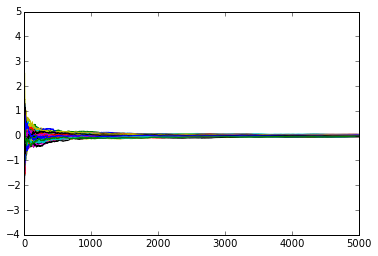

In [163]:
estimators=[]
for r in range(100):
    # burn in period:
    X=np.array(X0)
    for i in range(M):
        #print X0
        #mu1_23 = cond_mu(X[1:],mu[1:],mu[:1],cov_1[:1,1:],cov_1[1:,1:]) 
        mu1_23 = get_mu1_23(X[1:],cov_1)
        #print "mu1_23",mu1_23
        #print cov_3
        cov1_23 = get_cov1_23(cov_1)
        #print "cov1_23", cov1_23
        x1 = np.random.normal(np.asscalar(mu1_23),np.asscalar(cov1_23))
        #print X0
        X[0] = x1
        #print X0
        #print X
    
        mu23_1 = get_mu23_1(X[:1],cov_1)
        cov23_1 = get_cov23_1(cov_1)
        x_23 = np.random.multivariate_normal(mu23_1.flatten(),cov23_1,1)
        X[1]= x_23[0][0]
        X[2]= x_23[0][1]
        #print X
        
        
        # Iteration
    #N = 10000

    X_list = []
    avrg=[]    
    s=0
    for i in range(N):
        #mu1_23 = cond_mu(X[1:],mu[1:],mu[:1],cov_1[:1,1:],cov_1[1:,1:]) 
        #print X0
        #mu1_23 = cond_mu(X[1:],mu[1:],mu[:1],cov_1[:1,1:],cov_1[1:,1:]) 
        mu1_23 = get_mu1_23(X[1:],cov_1)
        #print "mu1_23",mu1_23
        #print cov_3
        cov1_23 = get_cov1_23(cov_1)
        #print "cov1_23", cov1_23
        x1 = np.random.normal(np.asscalar(mu1_23),np.asscalar(cov1_23))
        #print X0
        X[0] = x1
        #print X0
        #print X
    
        mu23_1 = get_mu23_1(X[:1],cov_1)
        cov23_1 = get_cov23_1(cov_1)
        x_23 = np.random.multivariate_normal(mu23_1.flatten(),cov23_1,1)
        X[1]= x_23[0][0]
        X[2]= x_23[0][1]
        #print X
    

        X_list.append(X.copy())
    
        f = np.dot(A[None,:],X[:,None])
        s=s+f[0,0]
        avrg.append(s/(i+1)) 
        
    t = range(N)
    plt.plot(t,avrg)
    estimators.append(avrg[N-1])

In [164]:
# Estimator
sample_mean = np.mean(estimators)
sample_variance = 1.0/(N-1)*np.sum([(e-sample_mean)**2 for e in estimators])
print sample_mean
print sample_variance

-0.000801820814869
9.49153120002e-06


|samples number|cov 1| cov 2| cov 3|
|---------|---------|---------|--------|
|sample mean|-0.000801820814869 |-0.00984185381787|-0.0124863688622 |
|sample var|9.49153120002e-06 |5.41425350225e-05|7.76945691417e-05 | 

### Correlation test

In [231]:
X_2_1=np.array(Xlist_p_clps_2_1)[:,0]
Z_2_1=np.array(Xlist_p_clps_2_1)[:,2]

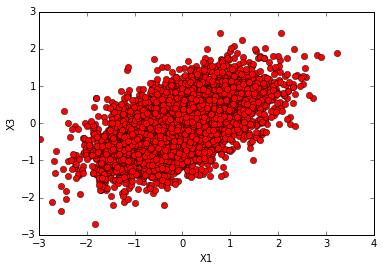

In [279]:
plt.plot(X_2_1,Z_2_1,'ro')
plt.xlabel('X1')
plt.ylabel('X3')

In [236]:
X_3_1=np.array(Xlist_p_clps_3_1)[:,0]
Z_3_1=np.array(Xlist_p_clps_3_1)[:,2]

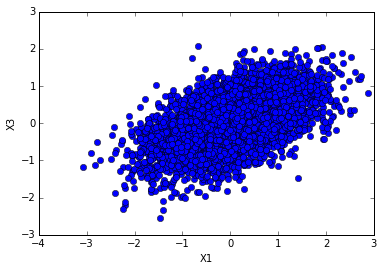

In [280]:
plt.plot(X_3_1,Z_3_1,'bo')
plt.xlabel('X1')
plt.ylabel('X3')

In [240]:
X_2_2=np.array(Xlist_p_clps_2_2)[:,0]
Z_2_2=np.array(Xlist_p_clps_2_2)[:,2]

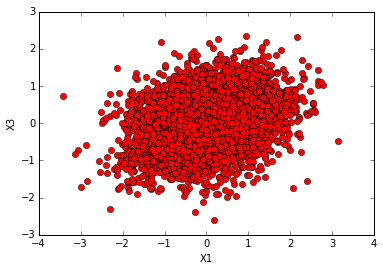

In [281]:
plt.plot(X_2_2,Z_2_2,'ro')
plt.xlabel('X1')
plt.ylabel('X3')

In [242]:
X_3_2=np.array(Xlist_p_clps_3_2)[:,0]
Z_3_2=np.array(Xlist_p_clps_3_2)[:,2]

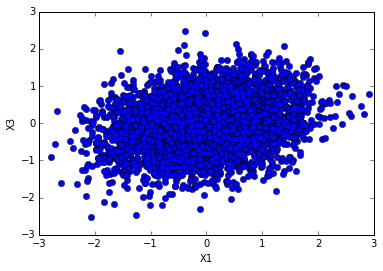

In [282]:
plt.plot(X_3_2,Z_3_2,'bo')
plt.xlabel('X1')
plt.ylabel('X3')

In [247]:
from scipy import stats
sp.stats.pearsonr(X_2_1, Z_2_1)

(0.56787655255292269, 0.0)

In [248]:
sp.stats.pearsonr(X_2_2, Z_2_2)

(0.27896234240589723, 4.790678444185366e-90)

In [249]:
sp.stats.pearsonr(X_3_1, Z_3_1)

(0.53048404038903674, 0.0)

In [250]:
sp.stats.pearsonr(X_3_2, Z_3_2)

(0.26560489243584973, 1.6932429628524377e-81)